<a href="https://colab.research.google.com/github/bhawna6617/-Dimensionality_Reduction_Ass-2/blob/main/diabetes_data_anlysic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv("cust1.csv")

In [ ]:
sns.set(style="whitegrid")  # bg =clean and reabable

In [ ]:
df.dropna(inplace=True) # data  cleaning

In [ ]:
df.drop_duplicates(inplace=True) # remove duplicat row

In [ ]:
def remove_outliers_iqr(df, columns):  # outlier remove
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [ ]:
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df = remove_outliers_iqr(df, numeric_cols) # remove outlier for numeric col

In [ ]:
print("mean")
print(df[numeric_cols].mean()) # find mean

mean
AGE      54.789022
Urea      4.544254
Cr       57.977702
HbA1c     8.483808
Chol      4.797942
TG        2.229846
HDL       1.112916
LDL       2.552230
VLDL      1.035849
BMI      29.498971
dtype: float64


In [ ]:
print("median")
print(df[numeric_cols].median()) #find mediam

median
AGE      55.0
Urea      4.4
Cr       56.0
HbA1c     8.3
Chol      4.8
TG        2.0
HDL       1.1
LDL       2.5
VLDL      0.9
BMI      30.0
dtype: float64


In [ ]:
print("mode")
print(df[numeric_cols].mode().iloc[0]) # find mode

mode
AGE      55.0
Urea      4.0
Cr       56.0
HbA1c     4.0
Chol      4.4
TG        2.1
HDL       0.9
LDL       2.5
VLDL      0.9
BMI      30.0
Name: 0, dtype: float64


<ipython-input-14-7853a8b1e610>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


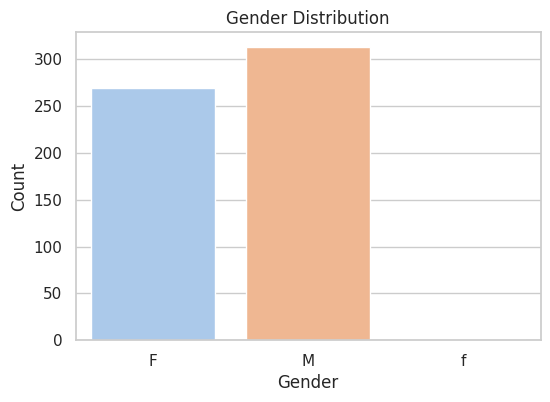

In [ ]:
plt.figure(figsize=(6, 4)) # m/f count
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-15-b4e1b778d64e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLASS', palette='Set2')


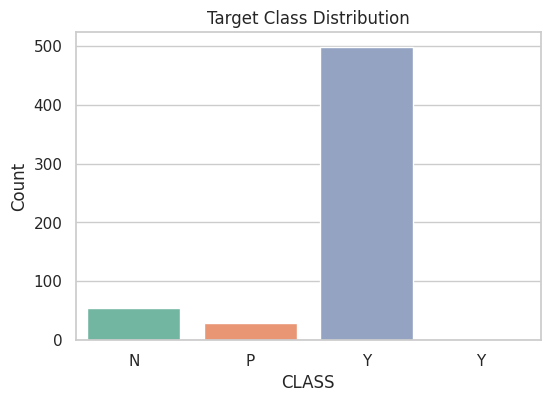

In [ ]:
plt.figure(figsize=(6, 4)) # class dist
sns.countplot(data=df, x='CLASS', palette='Set2')
plt.title('Target Class Distribution')
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.show()

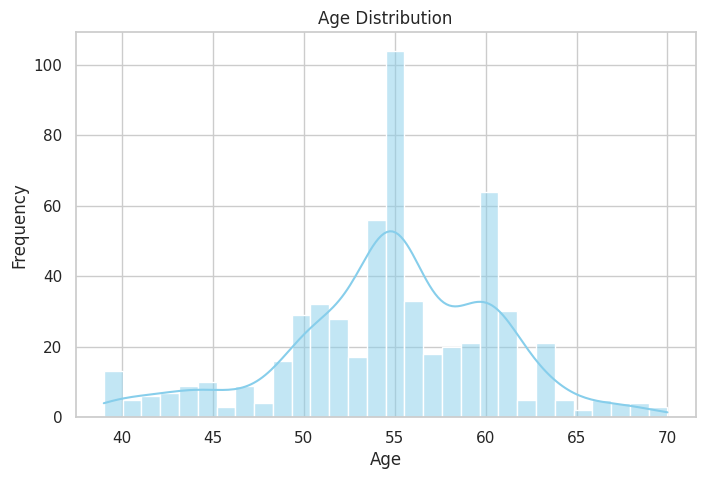

In [ ]:
plt.figure(figsize=(8, 5)) # age
sns.histplot(data=df, x='AGE', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

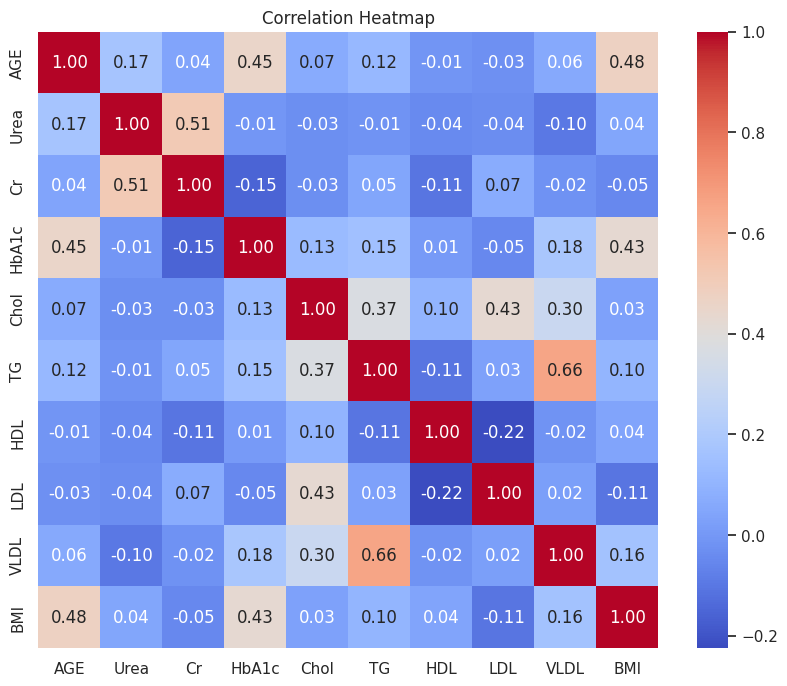

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-18-60a0d4b1a019>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=feature, data=df, palette='Set3')
<ipython-input-18-60a0d4b1a019>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=feature, data=df, palette='Set3')
<ipython-input-18-60a0d4b1a019>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y=feature, data=df, palette='Set3')
<ipython-input-18-60a0d4b1a019>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

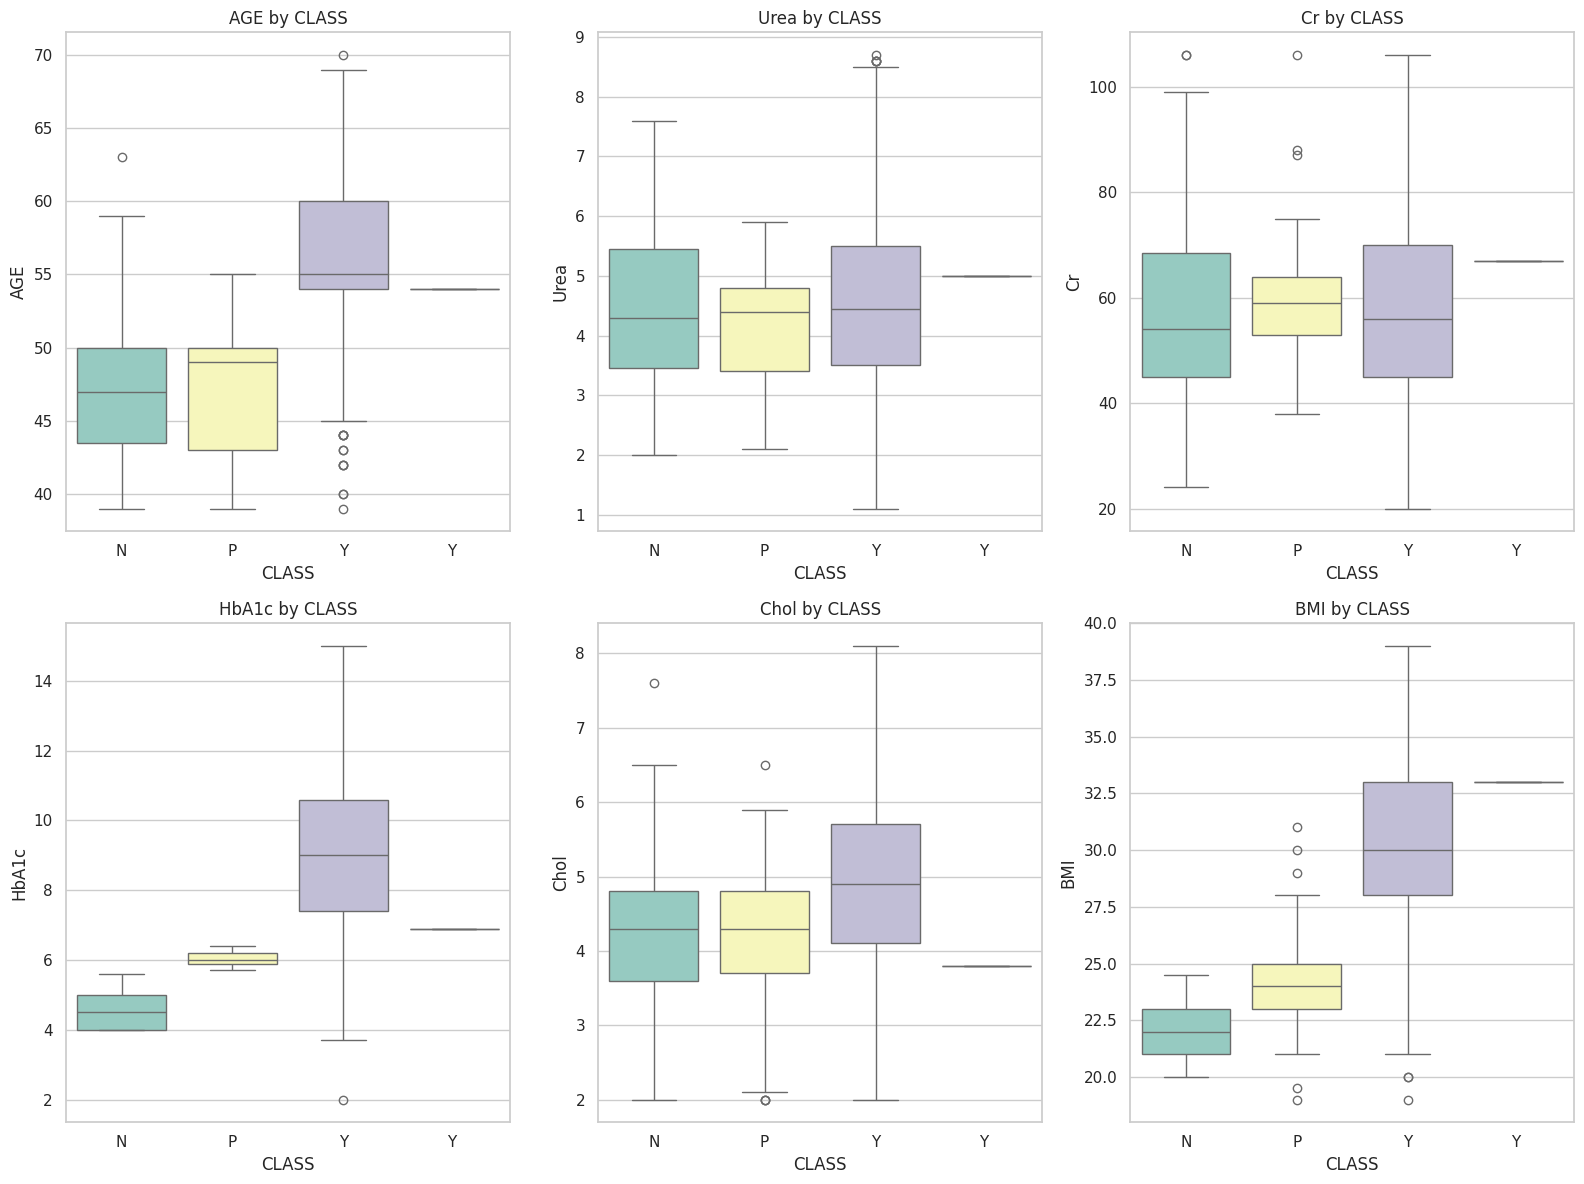

In [ ]:
features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'BMI']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='CLASS', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} by CLASS')
    plt.xlabel('CLASS')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) #numeric value m=0,f=1

In [ ]:
X = df.drop(columns=['CLASS'])
y = df['CLASS']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


 Classification Report
              precision    recall  f1-score   support

           N       1.00      1.00      1.00         8
           P       0.80      0.33      0.47        12
           Y       0.92      0.99      0.96        97

    accuracy                           0.92       117
   macro avg       0.91      0.77      0.81       117
weighted avg       0.92      0.92      0.91       117

Accuracy Score: 0.9230769230769231
